In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageOps

In [2]:
IMGS_PATH = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Bill Gates/'

In [3]:
def get_image_paths(directory, valid_extensions=(".jpg", ".jpeg", ".png", ".bmp", ".gif")):
    image_paths = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if file is an image based on its extension
            if file.lower().endswith(valid_extensions):
                # Append the full path of the image file to the list
                image_paths.append(os.path.join(root, file))
    
    return image_paths


def plt_img(image, cmap="gray"):
    """Display an image using matplotlib"""
    plt.imshow(image, cmap)
    plt.axis('on')
    plt.show()
    

def preprocess_img(image):
    # Dimensions
    IMG_W = 160
    IMG_H = 160
    
    # Resize the image
    image = cv.resize(image, dsize = (IMG_W, IMG_H))
    
    # Convert image stype
    image = image.astype(np.float32)/255.0
    
    return image


def plot_image_grid(images, images_per_row=5, total_images=50):
    # Ensure we don't exceed the available images or the limit of 50
    total_images = min(total_images, len(images))
    
    # Calculate the number of rows needed
    num_rows = (total_images + images_per_row - 1) // images_per_row

    # Create a figure with a grid of subplots
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 3 * num_rows))

    # Flatten the axes array in case of more than one row
    axs = axs.ravel()

    for i in range(total_images):
        # Read and display the image
        img = images[i]
        axs[i].imshow(img)
        axs[i].axis('off')  # Turn off the axis for clean presentation

    # Turn off any remaining unused subplots (if total_images < images_per_row * num_rows)
    for j in range(total_images, len(axs)):
        axs[j].axis('off')

    # Show the grid of images
    plt.tight_layout()
    plt.show()


def plt_rgb_channel_images(img):
    # Isolate the red channel
    red_channel = img[:, :, 0]
    red_image = np.zeros_like(img)
    red_image[:, :, 0] = red_channel
    
    # Isolate the green channel
    green_channel = img[:, :, 1]
    green_image = np.zeros_like(img)
    green_image[:, :, 1] = green_channel
    
    # Isolate the blue channel
    blue_channel = img[:, :, 2]
    blue_image = np.zeros_like(img)
    blue_image[:, :, 2] = blue_channel

    # Create a figure with a grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(10, 3 * 1))

    # Flatten the axes array in case of more than one row
    axs = axs.ravel()

    # Read and display the image
    axs[0].imshow(red_image)
    axs[0].axis('off')
    axs[0].title.set_text('Red Channel')
    
    # Read and display the image
    axs[1].imshow(green_image)
    axs[1].axis('off')
    axs[1].title.set_text('Green Channel')
    
    # Read and display the image
    axs[2].imshow(blue_image)
    axs[2].axis('off')
    axs[2].title.set_text('Blue Channel')
    
    # Show the grid of images
    plt.tight_layout()
    plt.show()
    

def plot_images_side_by_side(image1, image2, title='Comparison'):
    """
    Plots two images side by side in subplots.

    Parameters:
    - image1 (np.ndarray): The first image (numpy array).
    - image2 (np.ndarray): The second image (numpy array).
    - title (str): The title for the figure.
    """
    # Create a figure with 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the first image
    axs[0].imshow(image1)
    axs[0].axis('off')  # Hide axes
    axs[0].set_title('Image 1')
    
    # Plot the second image
    axs[1].imshow(image2)
    axs[1].axis('off')  # Hide axes
    axs[1].set_title('Image 2')
    
    # Set the overall title
    plt.suptitle(title)
    
    # Show the plot
    plt.show()


def remove_red_channel(image):
    """
    Remove the red channel from an image.
    
    :param image: PIL Image object
    :return: PIL Image object with the red channel removed
    """
    # Convert image to RGB mode (if not already in RGB)
    image = image.convert('RGB')
    
    # Convert the image to a NumPy array
    rgb_array = np.array(image)
    
    # Set the red channel to zero
    rgb_array[:, :, 0] = 0
    
    # Convert the NumPy array back to a PIL Image
    new_image = Image.fromarray(rgb_array, 'RGB')
    
    return new_image

def remove_green_channel(image):
    """
    Remove the red channel from an image.
    
    :param image: PIL Image object
    :return: PIL Image object with the red channel removed
    """
    # Convert image to RGB mode (if not already in RGB)
    image = image.convert('RGB')
    
    # Convert the image to a NumPy array
    rgb_array = np.array(image)
    
    # Set the red channel to zero
    rgb_array[:, :, 1] = 0
    
    # Convert the NumPy array back to a PIL Image
    new_image = Image.fromarray(rgb_array, 'RGB')
    
    return new_image

def remove_blue_channel(image):
    """
    Remove the red channel from an image.
    
    :param image: PIL Image object
    :return: PIL Image object with the red channel removed
    """
    # Convert image to RGB mode (if not already in RGB)
    image = image.convert('RGB')
    
    # Convert the image to a NumPy array
    rgb_array = np.array(image)
    
    # Set the red channel to zero
    rgb_array[:, :, 2] = 0
    
    # Convert the NumPy array back to a PIL Image
    new_image = Image.fromarray(rgb_array, 'RGB')
    
    return new_image
    

def remove_rgb_channel(image_path):
    # Load an image
    image = Image.open(image_path)
    
    img_gb = remove_red_channel(image)
    img_rb = remove_green_channel(image)
    img_rg = remove_blue_channel(image)
    
    # Create a figure with a grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(10, 3 * 1))

    # Flatten the axes array in case of more than one row
    axs = axs.ravel()
    
    # Read and display the image
    axs[0].imshow(img_gb)
    axs[0].axis('off')
    axs[0].title.set_text('Remove Red')
    
    # Read and display the image
    axs[1].imshow(img_rb)
    axs[1].axis('off')
    axs[1].title.set_text('Remove Green')
    
    # Read and display the image
    axs[2].imshow(img_rg)
    axs[2].axis('off')
    axs[2].title.set_text('Remove Blue')
    
    # Show the grid of images
    plt.tight_layout()
    plt.show()

    
def change_hue(image_path, hue_shift):
    """
    Change the hue of an image.
    
    :param image: PIL Image object
    :param hue_shift: Hue shift value in degrees (0 to 360)
    :return: PIL Image object with the hue changed
    """
    # Read image using PIL
    image = Image.open(image_path)
    
    # Convert image to HSV
    hsv_image = image.convert('HSV')
    
    # Convert HSV image to NumPy array
    hsv_array = np.array(hsv_image)
    
    # Extract the Hue channel (0), Saturation channel (1), and Value channel (2)
    h, s, v = hsv_array[:, :, 0], hsv_array[:, :, 1], hsv_array[:, :, 2]
    
    # Apply hue shift
    h = (h + hue_shift) % 256
    
    # Create a new HSV image with adjusted hue
    hsv_array[:, :, 0] = h
    
    # Convert NumPy array back to PIL Image
    new_hsv_image = Image.fromarray(hsv_array, 'HSV')
    
    # Convert HSV image back to RGB
    rgb_image = new_hsv_image.convert('RGB')
    
    return rgb_image

In [4]:
def get_image_paths(directory, valid_extensions=(".jpg", ".jpeg", ".png", ".bmp", ".gif")):
    image_paths = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if file is an image based on its extension
            if file.lower().endswith(valid_extensions):
                # Append the full path of the image file to the list
                image_paths.append(os.path.join(root, file))
    
    return image_paths


def plt_img(image, cmap="gray"):
    """Display an image using matplotlib"""
    plt.imshow(image, cmap)
    plt.axis('on')
    plt.show()


def plt_imgs_with_titles(images, titles):
    """
    Plot images in a single figure.

    Args:
        images (list of PIL.Image.Image): List of images to plot.
        titles (list of str): Titles for the images.
    """
    num_images = len(images)
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')

    plt.show()
    

def preprocess_img(image):
    # Dimensions
    IMG_W = 160
    IMG_H = 160
    
    # Resize the image
    image = cv.resize(image, dsize = (IMG_W, IMG_H))
    
    # Convert image stype
    image = image.astype(np.float32)/255.0
    
    return image


def add_salt_and_pepper_noise(image_path, salt_prob=0.01, pepper_prob=0.01):
    """
    Adds salt and pepper noise to an image.

    Parameters:
    - image_path (str): The path to the input image.
    - salt_prob (float): The probability of adding salt noise (white pixels).
    - pepper_prob (float): The probability of adding pepper noise (black pixels).

    Returns:
    - noisy_image (PIL Image): The noisy image with salt and pepper noise.
    """
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)

    # Get dimensions
    rows, cols, _ = image_array.shape

    # Generate salt and pepper noise
    salt_mask = np.random.rand(rows, cols) < salt_prob
    pepper_mask = np.random.rand(rows, cols) < pepper_prob

    # Create noisy image
    noisy_image_array = image_array.copy()
    noisy_image_array[salt_mask] = [255, 255, 255]  # Salt (white)
    noisy_image_array[pepper_mask] = [0, 0, 0]      # Pepper (black)

    return noisy_image_array


def plot_image_grid(images, images_per_row=5, total_images=50):
    # Ensure we don't exceed the available images or the limit of 50
    total_images = min(total_images, len(images))
    
    # Calculate the number of rows needed
    num_rows = (total_images + images_per_row - 1) // images_per_row

    # Create a figure with a grid of subplots
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 3 * num_rows))

    # Flatten the axes array in case of more than one row
    axs = axs.ravel()

    for i in range(total_images):
        # Read and display the image
        img = images[i]
        axs[i].imshow(img)
        axs[i].axis('off')  # Turn off the axis for clean presentation

    # Turn off any remaining unused subplots (if total_images < images_per_row * num_rows)
    for j in range(total_images, len(axs)):
        axs[j].axis('off')

    # Show the grid of images
    plt.tight_layout()
    plt.show()


def plt_rgb_channel_images(img):
    # Isolate the red channel
    red_channel = img[:, :, 0]
    red_image = np.zeros_like(img)
    red_image[:, :, 0] = red_channel
    
    # Isolate the green channel
    green_channel = img[:, :, 1]
    green_image = np.zeros_like(img)
    green_image[:, :, 1] = green_channel
    
    # Isolate the blue channel
    blue_channel = img[:, :, 2]
    blue_image = np.zeros_like(img)
    blue_image[:, :, 2] = blue_channel
    
    # Create a 2x1 subplot grid
#     plt.subplot(1, 3, 1) # nrows=2, ncols=1, index=1
#     plt.plot(red_image, green_image, blue_image) # Plot some data on the first subplot
#     plt.show()

In [5]:
def add_gaussian_noise(image_path, mean=0, variance=0.01):
    """
    Adds Gaussian noise to an image.

    Parameters:
    - image_path (str): The path to the input image.
    - mean (float): The mean of the Gaussian noise.
    - variance (float): The variance of the Gaussian noise.

    Returns:
    - noisy_image (PIL Image): The noisy image with Gaussian noise.
    """
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)

    # Generate Gaussian noise
    row, col, _ = image_array.shape
    sigma = np.sqrt(variance)
    gauss_noise = np.random.normal(mean, sigma, (row, col, 3))

    # Add Gaussian noise to the image
    noisy_image_array = image_array + gauss_noise * 255  # Scale noise to image range
    noisy_image_array = np.clip(noisy_image_array, 0, 255)  # Ensure pixel values are in [0, 255]

    return noisy_image_array


def add_poisson_noise(image_path):
    """
    Adds Poisson noise to an image.

    Parameters:
    - image_path (str): The path to the input image.

    Returns:
    - noisy_image (PIL Image): The noisy image with Poisson noise.
    """
    # Load image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image_array = np.array(image)

    # Normalize image to range [0, 1]
    image_array_normalized = image_array / 255.0

    # Add Poisson noise
    noisy_image_array_normalized = np.random.poisson(image_array_normalized * 255) / 255.0

    # Scale back to [0, 255] and convert to uint8
    noisy_image_array = np.clip(noisy_image_array_normalized * 255, 0, 255).astype(np.uint8)

    # Convert array back to PIL image
    noisy_image = Image.fromarray(noisy_image_array)

    return noisy_image

def add_speckle_noise(image_path, noise_variance=0.01):
    """
    Adds speckle noise to an image.

    Parameters:
    - image_path (str): The path to the input image.
    - noise_variance (float): The variance of the Gaussian noise used for speckle noise.

    Returns:
    - noisy_image (PIL Image): The noisy image with speckle noise.
    """
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)

    # Generate speckle noise
    noise = np.random.normal(0, np.sqrt(noise_variance), image_array.shape)

    # Add speckle noise to the image
    noisy_image_array = image_array + image_array * noise

    # Ensure pixel values are in [0, 255]
    noisy_image_array = np.clip(noisy_image_array, 0, 255).astype(np.uint8)

    # Convert array back to PIL image
    # noisy_image = Image.fromarray(noisy_image_array)

    return noisy_image_array

def add_local_variance_noise(image_path, base_variance=0.01, local_variance_scale=0.1):
    """
    Adds local variance noise to an image.

    Parameters:
    - image_path (str): The path to the input image.
    - base_variance (float): The base variance of the noise.
    - local_variance_scale (float): The scale of the local variance.

    Returns:
    - noisy_image (PIL Image): The noisy image with local variance noise.
    """
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image)

    # Normalize image to range [0, 1]
    image_array_normalized = image_array / 255.0

    # Generate local variance noise
    local_variance = base_variance + local_variance_scale * image_array_normalized**2
    noise = np.random.normal(0, np.sqrt(local_variance), image_array.shape)

    # Add local variance noise to the image
    noisy_image_array_normalized = image_array_normalized + noise
    noisy_image_array_normalized = np.clip(noisy_image_array_normalized, 0, 1)

    # Convert back to [0, 255] and uint8
    noisy_image_array = (noisy_image_array_normalized * 255).astype(np.uint8)

    return noisy_image_array


def apply_bit_resolution(image, bits):
    """
    Apply bit resolution to an image.
    
    Args:
        image (PIL.Image.Image): The input image.
        bits (int): The number of bits to use for the resolution.

    Returns:
        PIL.Image.Image: The image with the specified bit resolution applied.
    """
    # Convert image to numpy array
    img_array = np.array(image)

    # Calculate the maximum value for the given bit resolution
    max_value = (2 ** bits) - 1
    
    # Apply bit resolution
    img_array = (img_array // (256 // (max_value + 1))) * (256 // (max_value + 1))

    # Convert array back to image
    img_res = Image.fromarray(img_array.astype(np.uint8))
    
    return img_res

In [6]:
# Read all images
image_paths = get_image_paths(IMGS_PATH)

# Total samples
len(image_paths)

122

In [7]:
# Read image
img = plt.imread(image_paths[0])
print(img.shape)

(221, 209, 3)


In [8]:
img[0][0]

array([ 88, 103, 222], dtype=uint8)

## Display orginal RGB Image

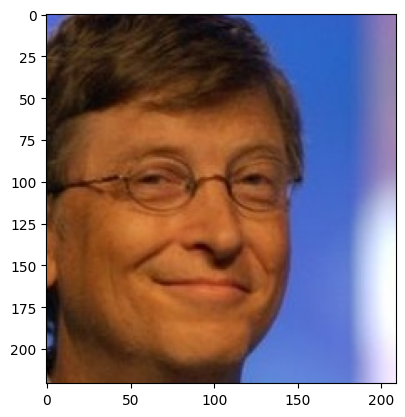

In [9]:
plt_img(img)

## Display Grayscale Image

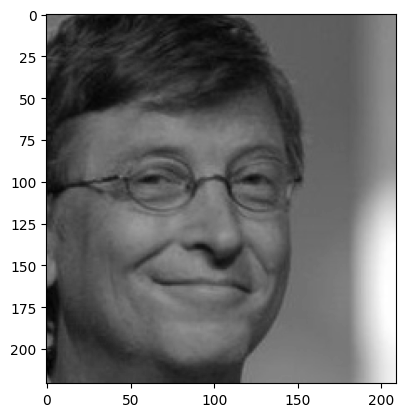

In [10]:
# Open the image file
image = Image.open(image_paths[0])

# Convert the image to grayscale
gray_image = image.convert('L')

# Show image
plt_img(gray_image)

## Display Color Channel Filters

In [11]:
plt_rgb_channel_images(img)

## Display Color Channel with their isolotion

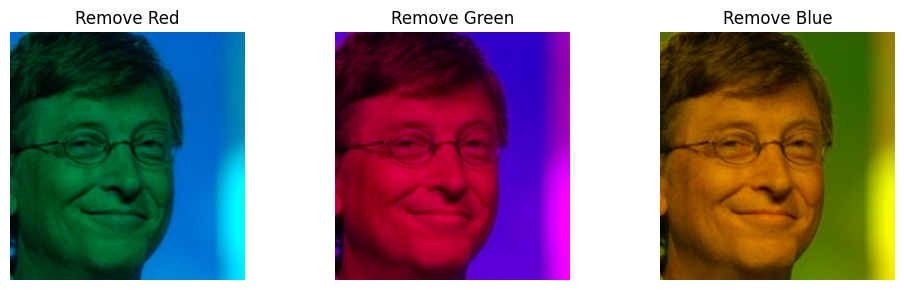

In [12]:
remove_rgb_channel(image_paths[0])

## Crop image

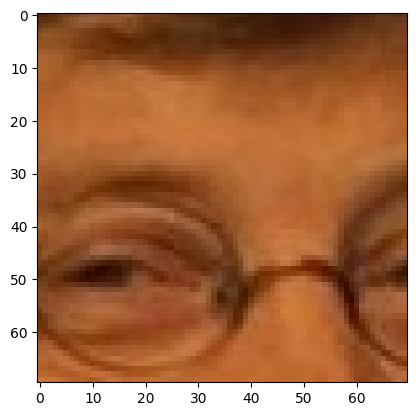

In [13]:
img = plt.imread(image_paths[0])
plt_img(img[50:120, 50:120, :])

## Image Sampling

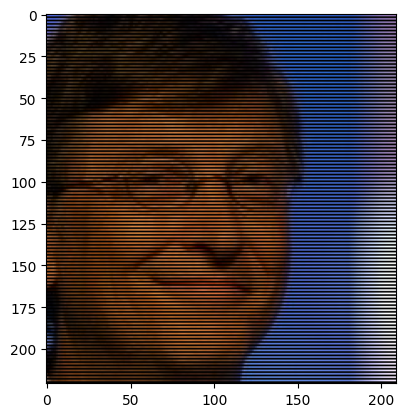

In [14]:
img = plt.imread(image_paths[0])

new_img = np.zeros_like(img)
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        if i % 2 == 0:
            new_img[i][j] = [0,0,0]
        else:
            new_img[i][j] = img[i][j]

plt_img(new_img)

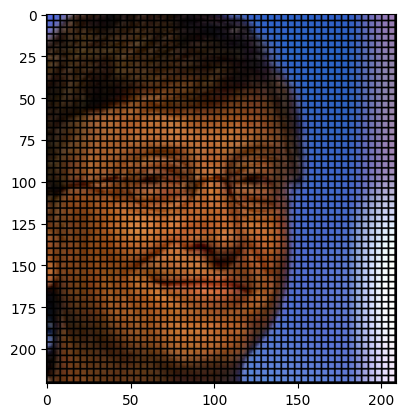

In [15]:
img = plt.imread(image_paths[0])
new_img = np.zeros_like(img)

# Set interval for rows and columns
interval = 4

# Iterate over the image
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if i % interval == 0 or j % interval == 0:
            new_img[i, j] = [0, 0, 0]  # Set pixel to black
        else:
            new_img[i, j] = img[i][j]

# Display the modified image
plt_img(new_img)

# Types of Noise

## Salt & Pepper Noise

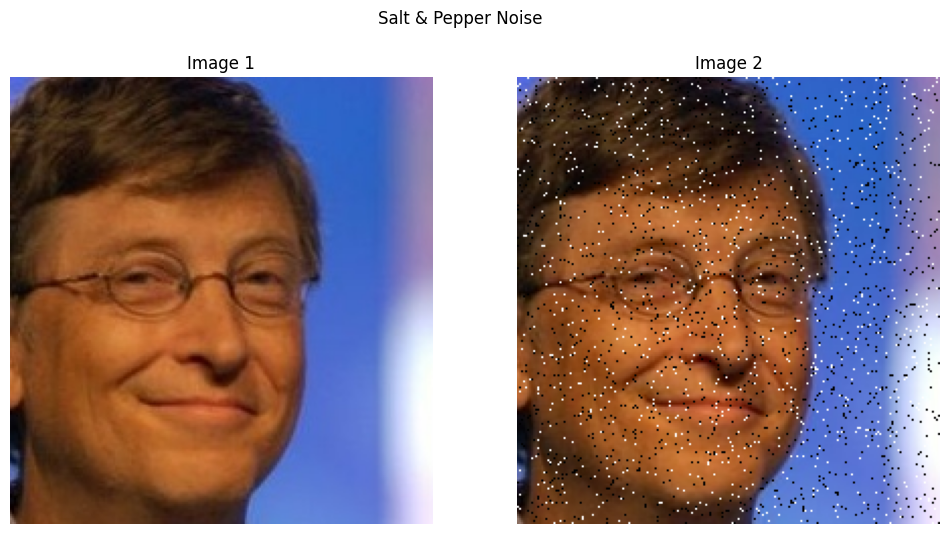

In [16]:
salt_and_pepper_noise = add_salt_and_pepper_noise(image_paths[0], salt_prob=0.02, pepper_prob=0.03)
plot_images_side_by_side(plt.imread(image_paths[0]),salt_and_pepper_noise, title='Salt & Pepper Noise')

## Guassian Noise

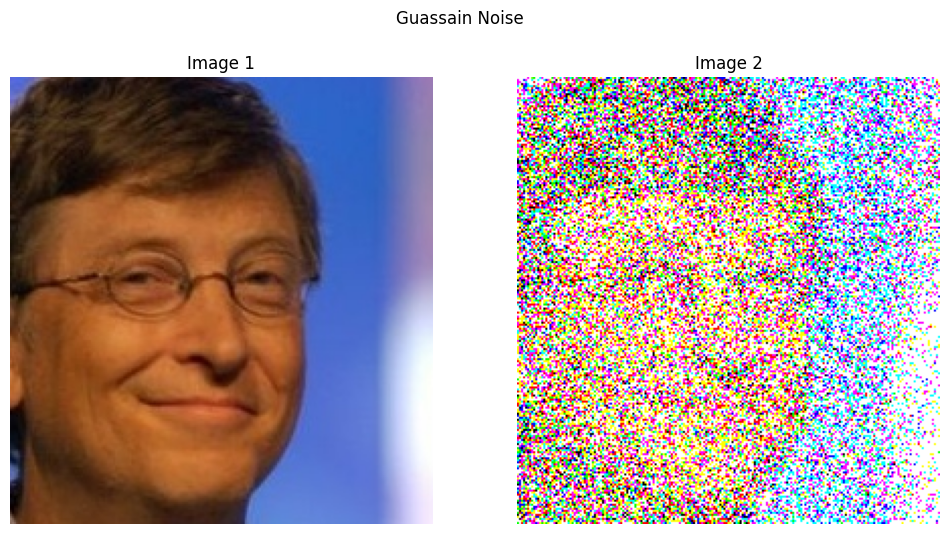

In [17]:
guassian_noise = add_gaussian_noise(image_paths[0], mean=0, variance=0.4)
plot_images_side_by_side(plt.imread(image_paths[0]),guassian_noise, title='Guassain Noise')

## Poisson Noise

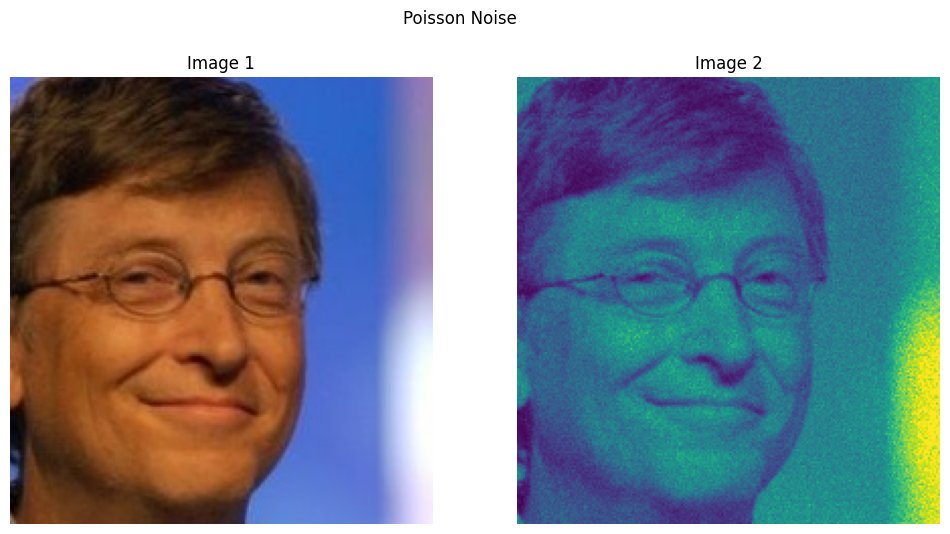

In [18]:
poisson_noise = add_poisson_noise(image_paths[0])
plot_images_side_by_side(plt.imread(image_paths[0]),poisson_noise, title='Poisson Noise')

## Speckle Noise

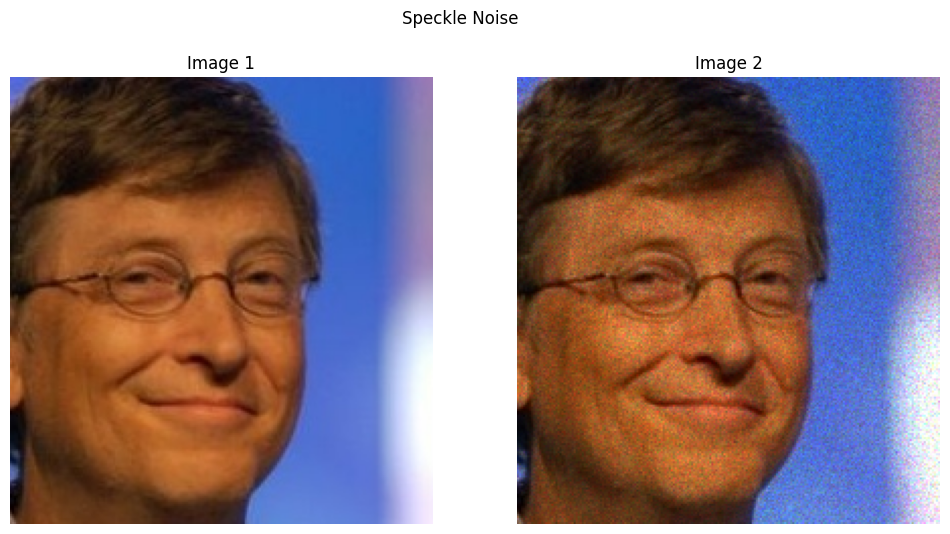

In [19]:
speckle_noise = add_speckle_noise(image_paths[0])
plot_images_side_by_side(plt.imread(image_paths[0]),speckle_noise, title='Speckle Noise')

## Local Variance Noise

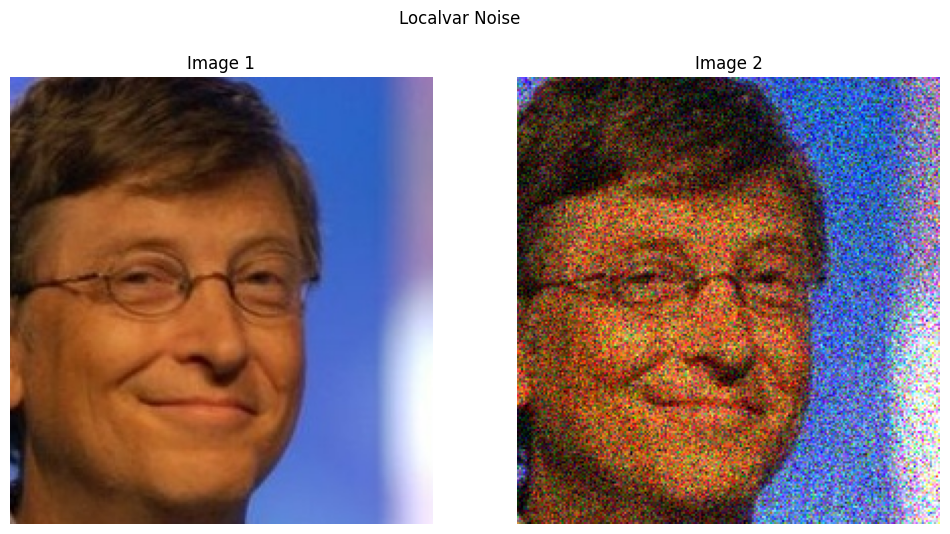

In [20]:
localvar_noise = add_local_variance_noise(image_paths[0])
plot_images_side_by_side(plt.imread(image_paths[0]),localvar_noise, title='Localvar Noise')

## Bit Resolution

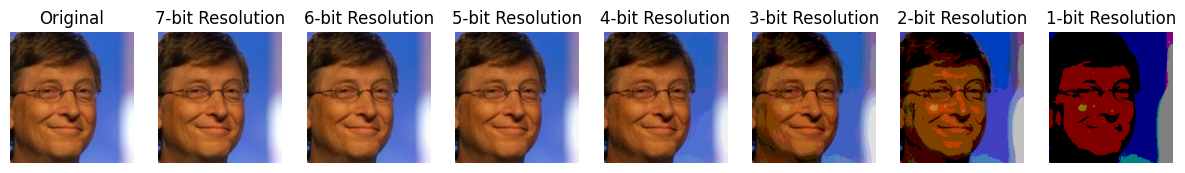

In [21]:
# Original Image
original_image = Image.open(image_paths[0]).convert('RGB')

# Bit resolutions to apply
bit_resolutions = [7, 6, 5, 4, 3, 2, 1]

# List to hold images for plotting
images = [original_image]
titles = ['Original']

# Apply each bit resolution and store the result
for bits in bit_resolutions:
    bit_res_image = apply_bit_resolution(original_image, bits)
    images.append(bit_res_image)
    titles.append(f'{bits}-bit Resolution')

# Plot the images
plt_imgs_with_titles(images, titles)

## Image Arithmetic

In [22]:
plt.imread(image_paths[0]).shape

(221, 209, 3)

In [23]:
plt.imread(image_paths[3]).shape

(320, 302, 3)

In [24]:
def add_images(img1: np.ndarray, img2: np.ndarray, size: tuple = (200, 200)) -> np.ndarray:
    """
    Resize two images to a given size and add them together.
    
    Args:
        img1 (np.ndarray): The first input image.
        img2 (np.ndarray): The second input image.
        size (tuple): The target size for resizing images (width, height).
    
    Returns:
        np.ndarray: The resultant image obtained by adding the two resized images.
    """
    # Resize the images to the given size
    img1_resized = cv.resize(img1, size, interpolation=cv.INTER_LINEAR)
    img2_resized = cv.resize(img2, size, interpolation=cv.INTER_LINEAR)
    
    # Ensure that the images have the same number of channels
    if img1_resized.shape[-1] != img2_resized.shape[-1]:
        raise ValueError("Input images must have the same number of channels")

    # Add the two images
    result = cv.add(img1_resized, img2_resized)
    
    return result


def subtract_images(img1: np.ndarray, img2: np.ndarray, size: tuple = (200, 200)) -> np.ndarray:
    """
    Resize two images to a given size and add them together.
    
    Args:
        img1 (np.ndarray): The first input image.
        img2 (np.ndarray): The second input image.
        size (tuple): The target size for resizing images (width, height).
    
    Returns:
        np.ndarray: The resultant image obtained by adding the two resized images.
    """
    # Resize the images to the given size
    img1_resized = cv.resize(img1, size, interpolation=cv.INTER_LINEAR)
    img2_resized = cv.resize(img2, size, interpolation=cv.INTER_LINEAR)
    
    # Ensure that the images have the same number of channels
    if img1_resized.shape[-1] != img2_resized.shape[-1]:
        raise ValueError("Input images must have the same number of channels")

    # Add the two images
    result = cv.subtract(img1_resized, img2_resized)
    
    return result

def multiply_images(img1: np.ndarray, img2: np.ndarray, size: tuple = (200, 200)) -> np.ndarray:
    """
    Resize two images to a given size and add them together.
    
    Args:
        img1 (np.ndarray): The first input image.
        img2 (np.ndarray): The second input image.
        size (tuple): The target size for resizing images (width, height).
    
    Returns:
        np.ndarray: The resultant image obtained by adding the two resized images.
    """
    # Resize the images to the given size
    img1_resized = cv.resize(img1, size, interpolation=cv.INTER_LINEAR)
    img2_resized = cv.resize(img2, size, interpolation=cv.INTER_LINEAR)
    
    # Ensure that the images have the same number of channels
    if img1_resized.shape[-1] != img2_resized.shape[-1]:
        raise ValueError("Input images must have the same number of channels")

    # Add the two images
    result = cv.multiply(img1_resized, img2_resized)
    
    return result


def divide_images(img1: np.ndarray, img2: np.ndarray, size: tuple = (200, 200)) -> np.ndarray:
    """
    Resize two images to a given size and add them together.
    
    Args:
        img1 (np.ndarray): The first input image.
        img2 (np.ndarray): The second input image.
        size (tuple): The target size for resizing images (width, height).
    
    Returns:
        np.ndarray: The resultant image obtained by adding the two resized images.
    """
    # Resize the images to the given size
    img1_resized = cv.resize(img1, size, interpolation=cv.INTER_LINEAR)
    img2_resized = cv.resize(img2, size, interpolation=cv.INTER_LINEAR)
    
    # Ensure that the images have the same number of channels
    if img1_resized.shape[-1] != img2_resized.shape[-1]:
        raise ValueError("Input images must have the same number of channels")

    # To avoid division by zero, add a small epsilon to the divisor
    epsilon = 1e-10
    img2_resized_safe = np.clip(img2_resized, epsilon, None)  # Avoid division by zero

    # Convert images to float32 to avoid overflow and precision issues during division
    img1_resized_float = img1_resized.astype(np.float32)
    img2_resized_safe_float = img2_resized_safe.astype(np.float32)

    # Perform the division
    result_float = np.divide(img1_resized_float, img2_resized_safe_float)
    
    # Clip the result to valid range [0, 255] for uint8 images and convert back to uint8
    result_uint8 = np.clip(result_float, 0, 255).astype(np.uint8)
    
    return result_uint8

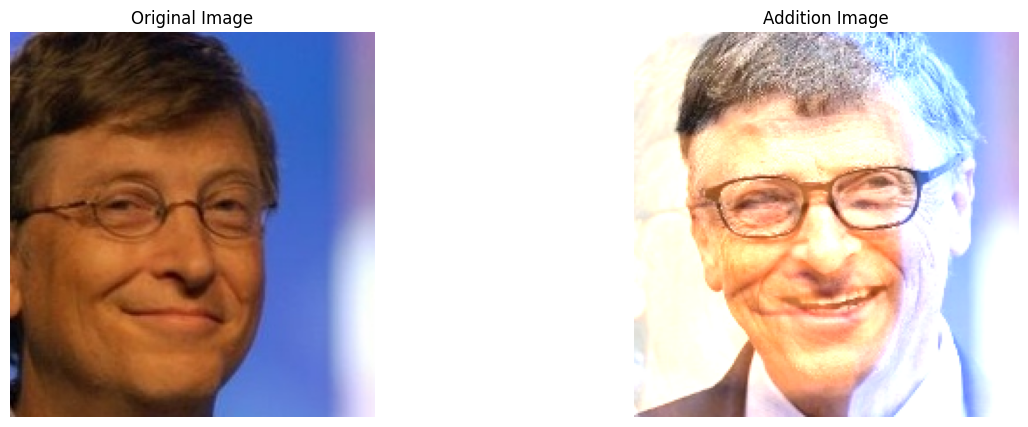

In [25]:
addtion_img = add_images(plt.imread(image_paths[0]), plt.imread(image_paths[3]))
plt_imgs_with_titles([plt.imread(image_paths[0]),addtion_img], ["Original Image", "Addition Image"])

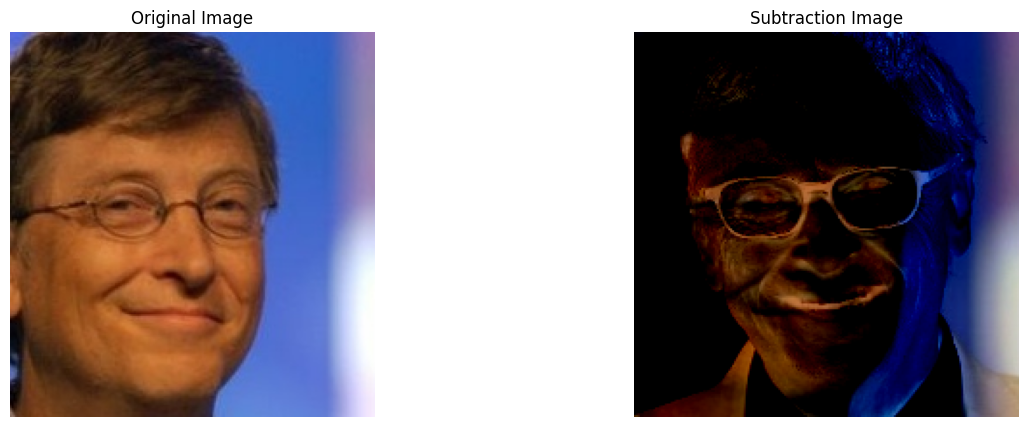

In [26]:
subtracted_img = subtract_images(plt.imread(image_paths[0]), plt.imread(image_paths[3]))
plt_imgs_with_titles([plt.imread(image_paths[0]),subtracted_img], ["Original Image", "Subtraction Image"])

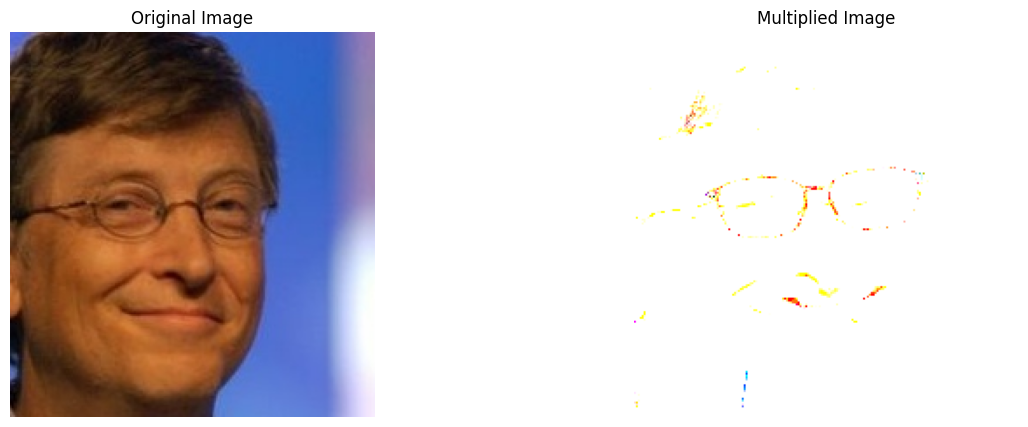

In [27]:
multiplied_img = multiply_images(plt.imread(image_paths[0]), plt.imread(image_paths[3]))
plt_imgs_with_titles([plt.imread(image_paths[0]),multiplied_img], ["Original Image", "Multiplied Image"])

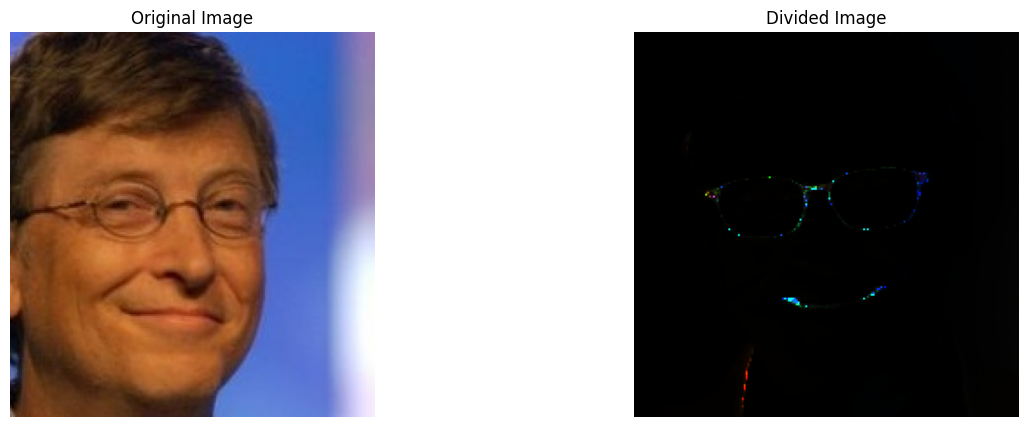

In [28]:
divided_img = divide_images(plt.imread(image_paths[0]), plt.imread(image_paths[3]))
plt_imgs_with_titles([plt.imread(image_paths[0]), divided_img], ["Original Image", "Divided Image"])

## Adjust image hue degrees

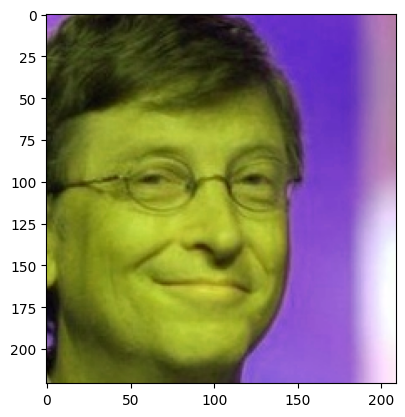

In [29]:
# Adjust the hue
hue_shift = 30  # Shift hue by 30 degrees
new_image = change_hue(image_paths[0], hue_shift)

plt_img(new_image)

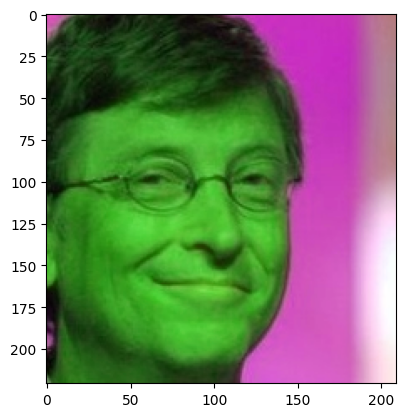

In [30]:
# Adjust the hue
hue_shift = 60  # Shift hue by 60 degrees
new_image = change_hue(image_paths[0], hue_shift)

plt_img(new_image)

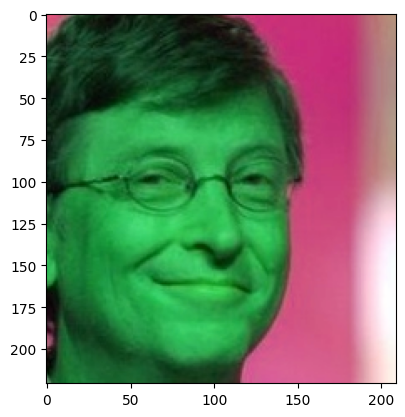

In [31]:
# Adjust the hue
hue_shift = 80  # Shift hue by 80 degrees
new_image = change_hue(image_paths[0], hue_shift)

plt_img(new_image)